In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import yfinance as yf

In [2]:
aapl = yf.download("AAPL", start="2012-01-01", end="2022-10-16")

[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.DataFrame(aapl)
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726296,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838934,394024400
...,...,...,...,...,...,...
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.187439,74899000
2022-10-11,139.899994,141.350006,138.220001,138.979996,138.749832,77033700
2022-10-12,139.130005,140.360001,138.160004,138.339996,138.110886,70433700


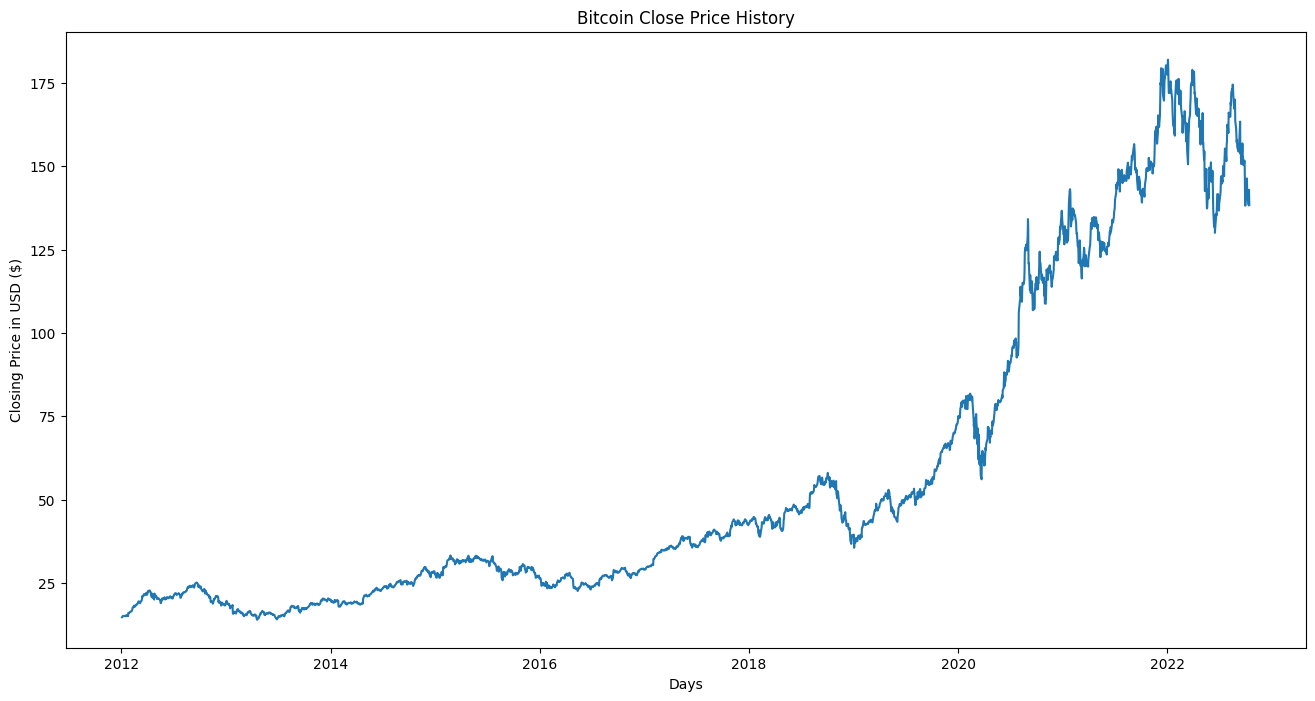

In [4]:
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Bitcoin Close Price History')
plt.xlabel('Days')
plt.ylabel('Closing Price in USD ($)')
plt.plot(df['Close'])
plt.show()

In [5]:
# Dropping columns we won't be using for the predictions of closing price
X = df.drop(['Close', 'Adj Close'], axis=1)

# Getting just the closing price column
y = df[['Close']]

# Test train split (with same random state)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.05)

X

,Open,High,Low,Volume
Date,,,,
2012-01-03,14.621429,14.732143,14.607143,302220800
2012-01-04,14.642857,14.810000,14.617143,260022000
2012-01-05,14.819643,14.948214,14.738214,271269600
2012-01-06,14.991786,15.098214,14.972143,318292800
2012-01-09,15.196429,15.276786,15.048214,394024400
...,...,...,...,...
2022-10-10,140.419998,141.889999,138.570007,74899000
2022-10-11,139.899994,141.350006,138.220001,77033700
2022-10-12,139.130005,140.360001,138.160004,70433700


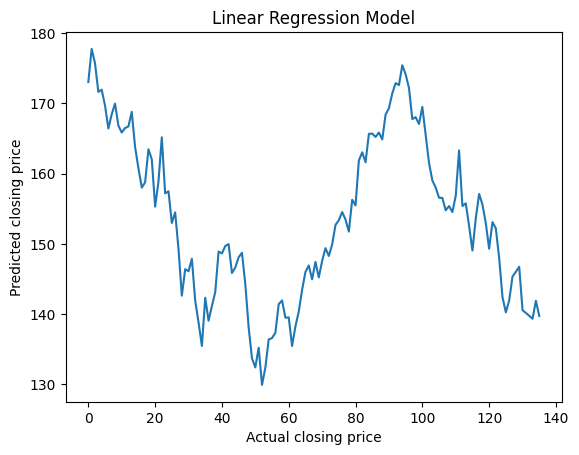

In [6]:
# Fitting the multiple linear regression model with the training data
linear = LinearRegression().fit(X_train,y_train)

# Making predictions using the testing data
predicted = linear.predict(X_test)

# Plotting the predicted values against the actual values
plt.plot(predicted)
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Linear Regression Model')
plt.show()

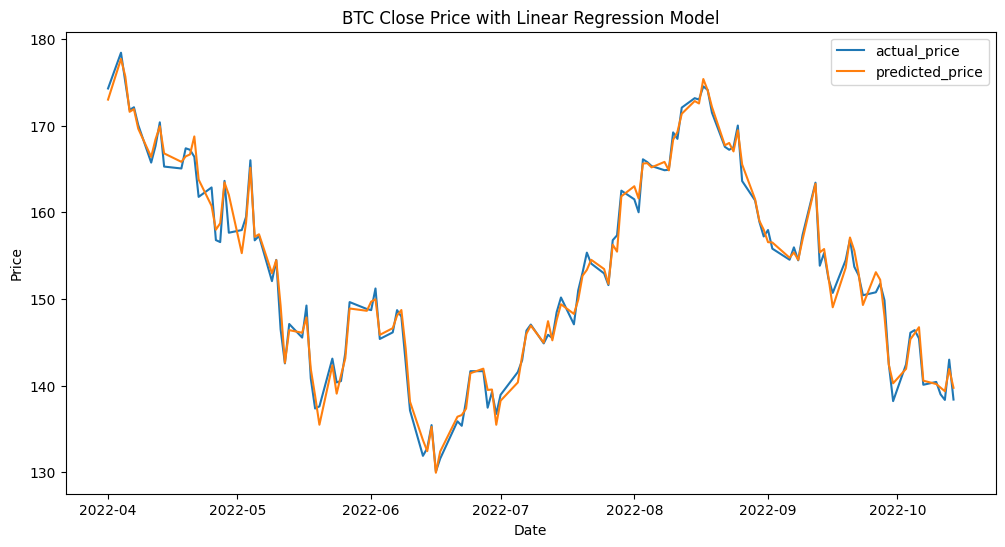

In [7]:
predicted_price = pd.DataFrame(predicted,index=y_test.index,columns = ['lr_price'])
predicted_price['actual'] = df['Close']
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(predicted_price['lr_price'])  

plt.legend(['actual_price','predicted_price'])
plt.title('BTC Close Price with Linear Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

In [8]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicted), 4))
print(f'Train Score: {linear.score(X_train, y_train) * 100:.2f}% and Test Score: {linear.score(X_test, y_test) * 100:.2f}% using Linear Regression.')

errors = abs(predicted - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.8626
Mean Squared Error: 1.2265
Root Mean Squared Error: 1.1075
(R^2) Score: 0.9909
Train Score: 99.99% and Test Score: 99.09% using Linear Regression.
Accuracy: Close    99.43
dtype: float64 %.


/run/media/rrompf/Nový zväzok/code/Machine_Learning_and_Deep_Learning/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
predicted_price

,lr_price,actual
Date,,
2022-04-01,173.025450,174.309998
2022-04-04,177.725376,178.440002
2022-04-05,175.701554,175.059998
2022-04-06,171.617893,171.830002
2022-04-07,171.926375,172.139999
...,...,...
2022-10-10,140.175180,140.419998
2022-10-11,139.766371,138.979996
2022-10-12,139.341020,138.339996


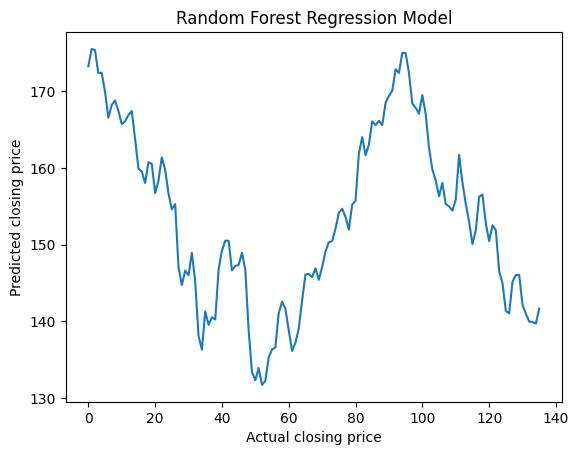

In [10]:
# Fitting the multiple linear regression model with the training data
forest = RandomForestRegressor(random_state=1, n_estimators=42, min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=True)

forest.fit(X_train, y_train.values.ravel())

# Making predictions using the testing data
predicted = forest.predict(X_test)

# Plotting the predicted values against the actual values
plt.plot(predicted)
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Random Forest Regression Model')
plt.show()

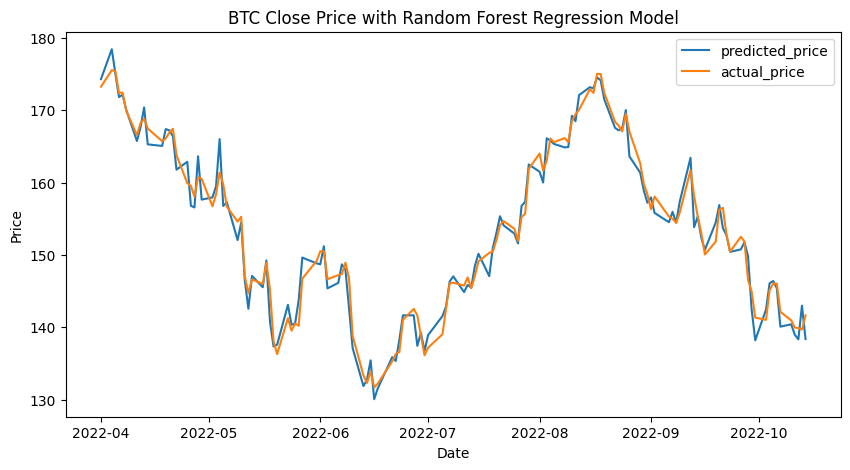

In [11]:
predicted_price['forest_price'] = predicted
plt.figure(figsize=(10,5))
plt.plot(y_test)  
plt.plot(predicted_price['forest_price'])  

plt.legend(['predicted_price','actual_price'])  
plt.title('BTC Close Price with Random Forest Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

In [12]:
predicted_price

,lr_price,actual,forest_price
Date,,,
2022-04-01,173.025450,174.309998,173.268571
2022-04-04,177.725376,178.440002,175.543571
2022-04-05,175.701554,175.059998,175.393333
2022-04-06,171.617893,171.830002,172.401431
2022-04-07,171.926375,172.139999,172.431908
...,...,...,...
2022-10-10,140.175180,140.419998,140.967144
2022-10-11,139.766371,138.979996,139.963098
2022-10-12,139.341020,138.339996,139.900718


In [13]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicted), 4))
print(f'Train Score: {linear.score(X_train, y_train) * 100:.2f}% and Test Score: {linear.score(X_test, y_test) * 100:.2f}% using Random Forest Regressor.')

Mean Absolute Error: 1.3597
Mean Squared Error: 2.9885
Root Mean Squared Error: 1.7287
(R^2) Score: 0.9779
Train Score: 99.99% and Test Score: 99.09% using Random Forest Regressor.


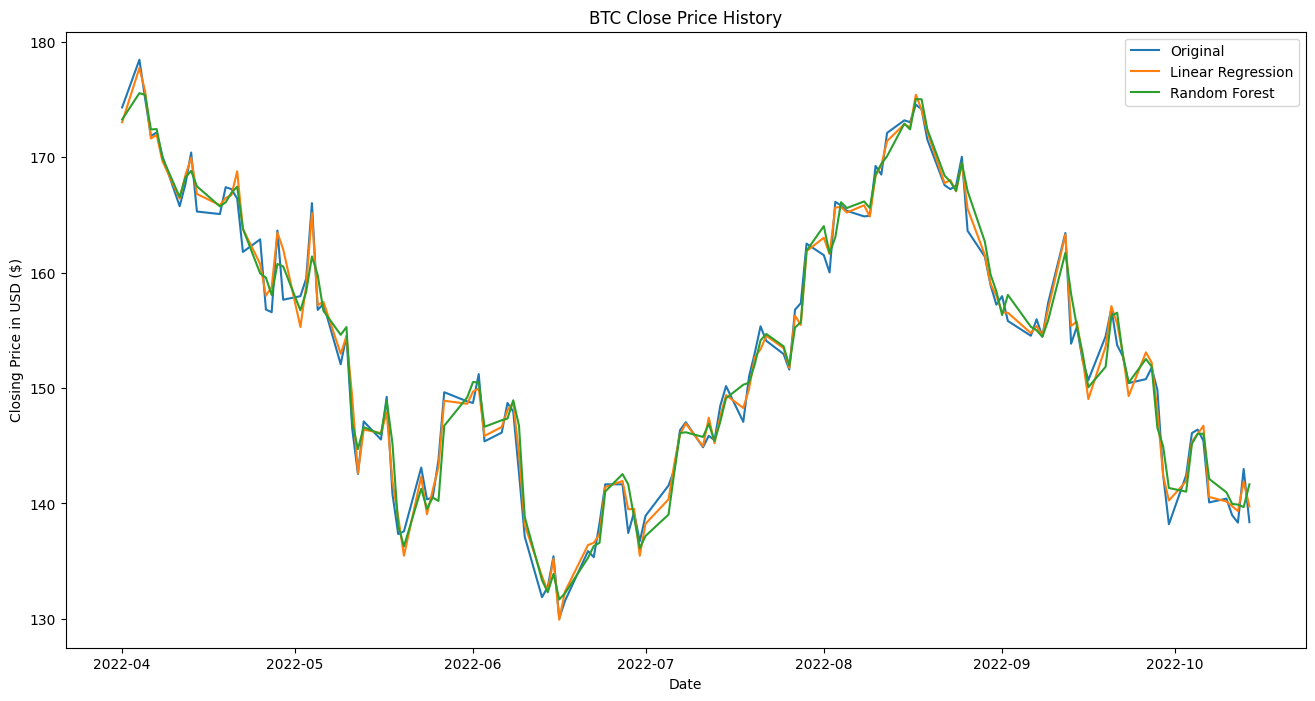

In [14]:
# compare
plt.figure(figsize=(16,8))
plt.title('BTC Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD ($)')

plt.plot(predicted_price['actual'])
plt.plot(predicted_price['lr_price'])
plt.plot(predicted_price['forest_price'])
plt.legend(['Original', 'Linear Regression', 'Random Forest'])
plt.show()

# BITCOIN

In [15]:
btc = yf.download("BTC-USD", start="2012-01-01", end="2022-10-16")
df = pd.DataFrame(btc)
df.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910
2022-10-12,19052.646484,19203.199219,19029.757812,19157.445312,19157.445312,24950173846
2022-10-13,19156.966797,19453.328125,18319.822266,19382.904297,19382.904297,44219840004


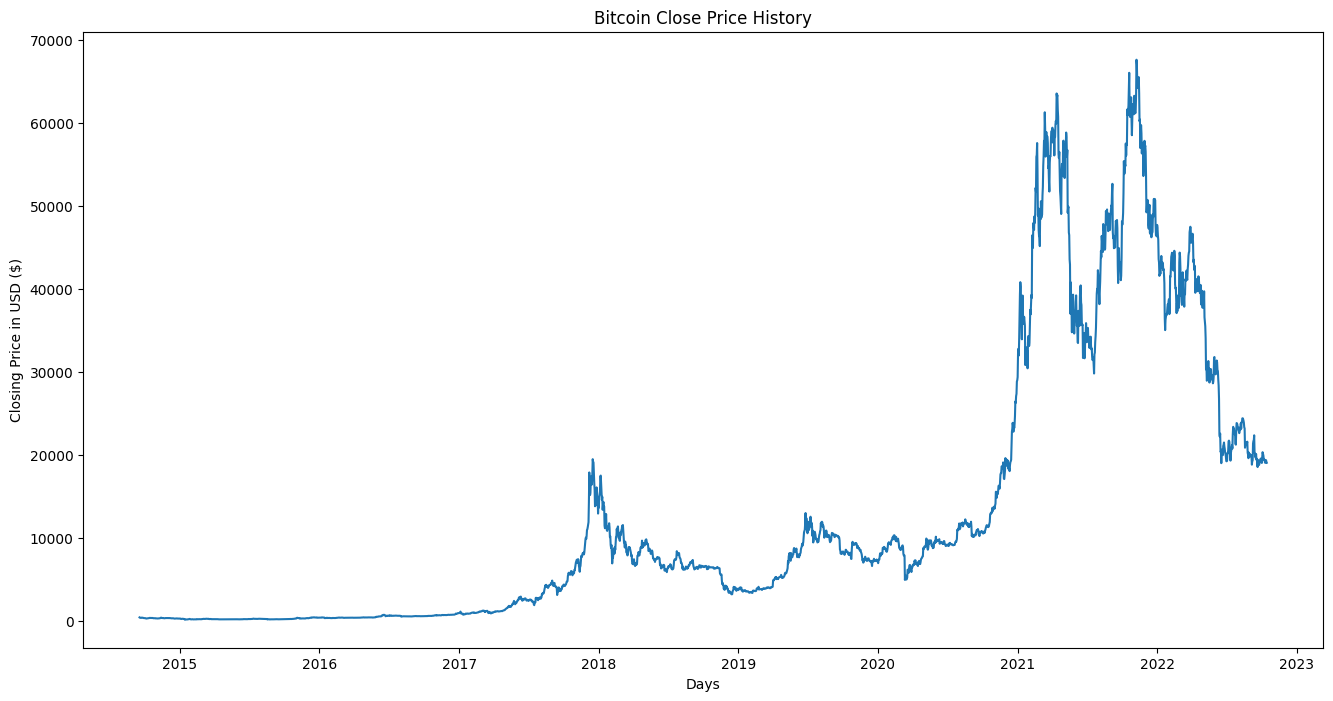

In [16]:
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Bitcoin Close Price History')
plt.xlabel('Days')
plt.ylabel('Closing Price in USD ($)')
plt.plot(df['Close'])
plt.show()

In [17]:
future_days = 2
df_prices = df[['Close']]
df_prices['Prediction'] = df_prices[['Close']].shift(-future_days)

/tmp/ipykernel_983/2603665882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Prediction'] = df_prices[['Close']].shift(-future_days)


In [22]:
df_prices

,Close,Prediction
Date,,
2014-09-17,457.334015,394.795990
2014-09-18,424.440002,408.903992
2014-09-19,394.795990,398.821014
2014-09-20,408.903992,402.152008
2014-09-21,398.821014,435.790985
...,...,...
2022-10-11,19051.417969,19382.904297
2022-10-12,19157.445312,19185.656250
2022-10-13,19382.904297,19067.634766


In [18]:
X = np.array(df_prices.drop(['Prediction'], 1))[:-future_days]
y = np.array(df_prices['Prediction'])[:-future_days]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)

forest = RandomForestRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

/tmp/ipykernel_983/2446520863.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_prices.drop(['Prediction'], 1))[:-future_days]


In [19]:
x_future = df_prices.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

/tmp/ipykernel_983/478940761.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df_prices.drop(['Prediction'], 1)[:-future_days]


In [20]:
forest_pred = forest.predict(x_future)
lr_pred = linear.predict(x_future)

prediction_forest = forest_pred
prediction_linear = lr_pred

valid = df_prices[X.shape[0]:]
valid['Prediction_Forest'] = prediction_forest
valid['Prediction_Linear'] = prediction_linear

/tmp/ipykernel_983/3297353953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction_Forest'] = prediction_forest
/tmp/ipykernel_983/3297353953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction_Linear'] = prediction_linear


In [21]:
valid

,Close,Prediction,Prediction_Forest,Prediction_Linear
Date,,,,
2022-10-14,19185.656250,NaN,17503.579336,19105.253935
2022-10-15,19067.634766,NaN,18595.561270,19329.771323


In [16]:
# Dropping columns we won't be using for the predictions of closing price
X = df.drop(['Close', 'Adj Close'], axis=1)

# Getting just the closing price column
y = df[['Close']]

# Test train split (with same random state)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.10)

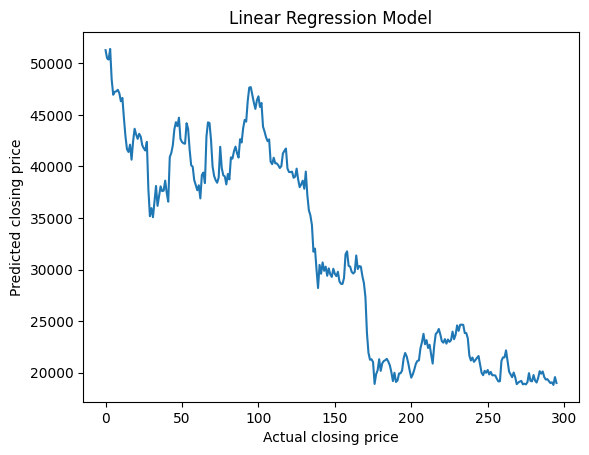

In [17]:
# Fitting the multiple linear regression model with the training data
linear = LinearRegression().fit(X_train,y_train)

# Making predictions using the testing data
predicted = linear.predict(X_test)

# Plotting the predicted values against the actual values
plt.plot(predicted)
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Linear Regression Model')
plt.show()

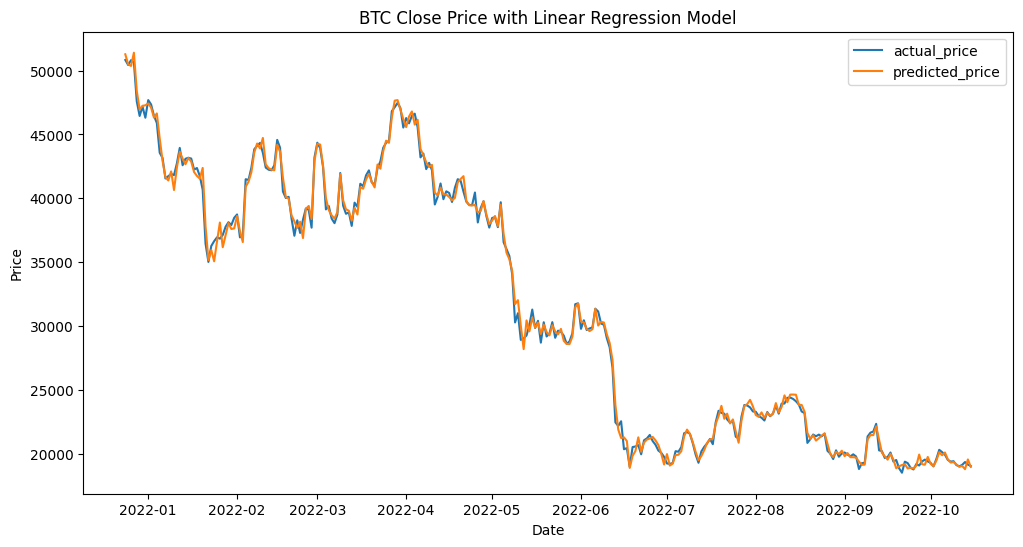

In [18]:
predicted_price = pd.DataFrame(predicted,index=y_test.index,columns = ['lr_price'])
predicted_price['actual'] = df['Close']
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(predicted_price['lr_price'])  

plt.legend(['actual_price','predicted_price'])
plt.title('BTC Close Price with Linear Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

In [19]:
# RANDOM FOREST
# Fitting the multiple linear regression model with the training data
forest = RandomForestRegressor(random_state=1, n_estimators=42, min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=True)

forest.fit(X_train, y_train.values.ravel())

# Making predictions using the testing data
predicted = forest.predict(X_test)

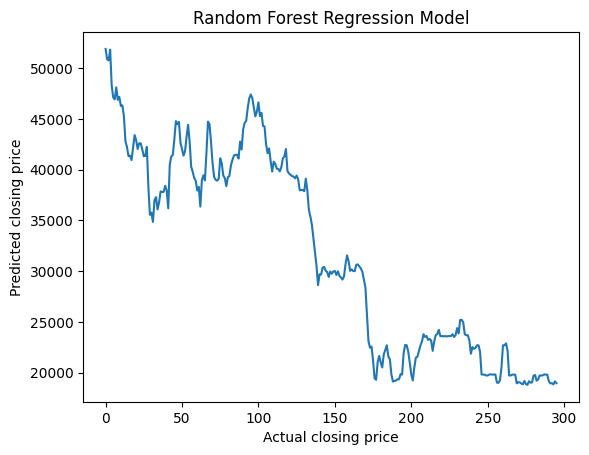

In [20]:
# Plotting the predicted values against the actual values
plt.plot(predicted)
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Random Forest Regression Model')
plt.show()

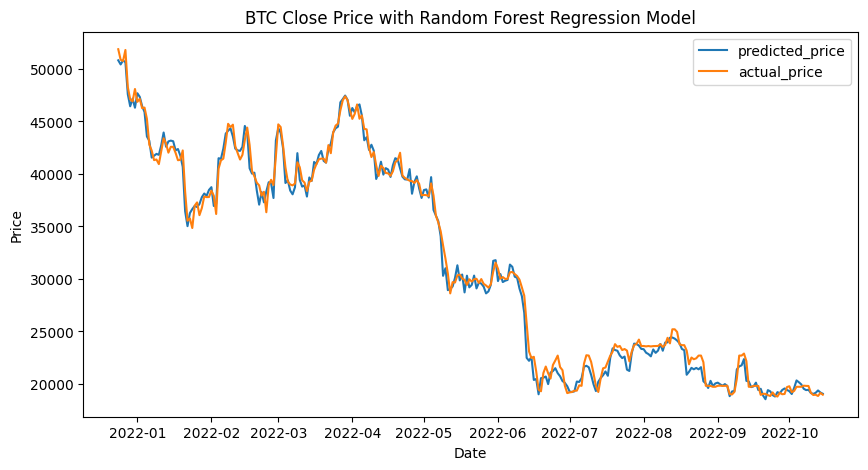

In [21]:
predicted_price['forest_price'] = predicted
plt.figure(figsize=(10,5))
plt.plot(y_test)  
plt.plot(predicted_price['forest_price'])  

plt.legend(['predicted_price','actual_price'])  
plt.title('BTC Close Price with Random Forest Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

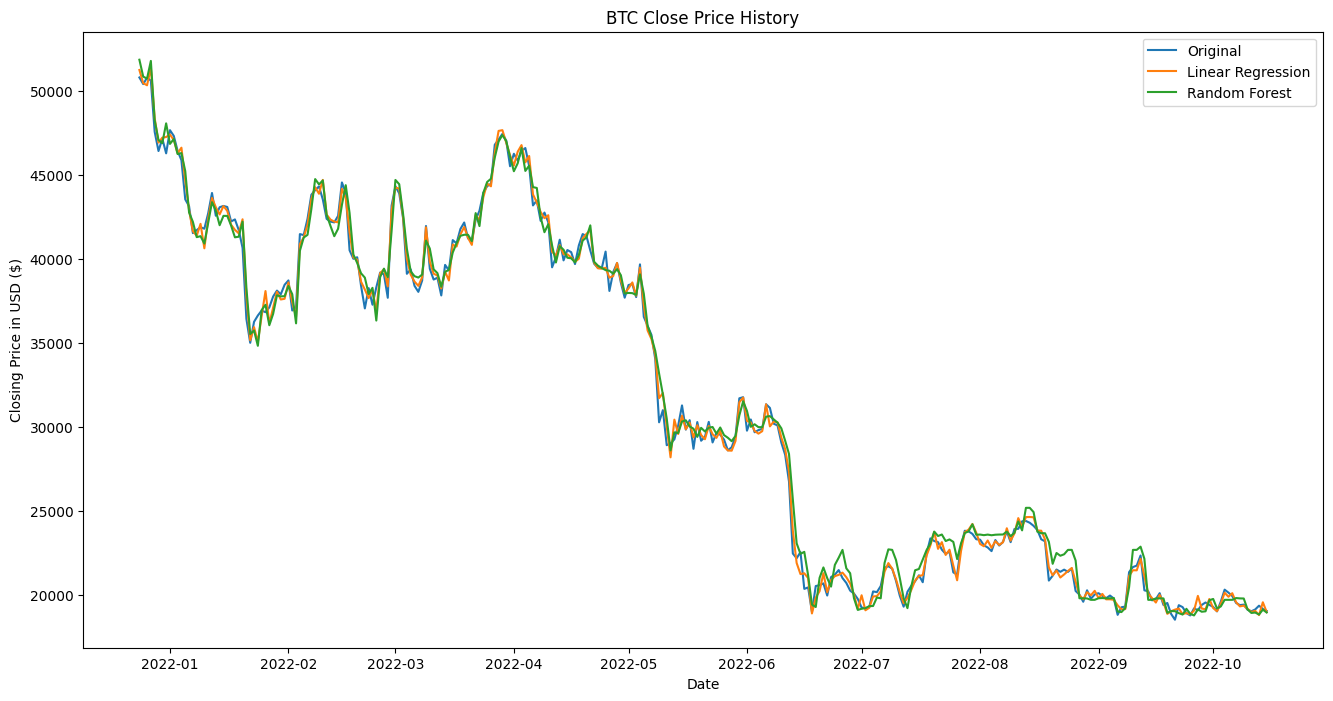

In [22]:
# compare
plt.figure(figsize=(16,8))
plt.title('BTC Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD ($)')

plt.plot(predicted_price['actual'])
plt.plot(predicted_price['lr_price'])
plt.plot(predicted_price['forest_price'])
plt.legend(['Original', 'Linear Regression', 'Random Forest'])
plt.show()

---

In [49]:
btc = yf.download("BTC-USD", start="2012-01-01", end="2022-10-16")
df = pd.DataFrame(btc)
df.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910
2022-10-12,19052.646484,19203.199219,19029.757812,19157.445312,19157.445312,24950173846
2022-10-13,19156.966797,19453.328125,18319.822266,19382.904297,19382.904297,44219840004


In [50]:
future_days = 2
df_prices = df.copy()
df_prices['Prediction'] = df_prices[['Close']].shift(-future_days)

df_prices

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,394.795990
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,408.903992
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,398.821014
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,402.152008
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,435.790985
...,...,...,...,...,...,...,...
2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910,19382.904297
2022-10-12,19052.646484,19203.199219,19029.757812,19157.445312,19157.445312,24950173846,19185.656250
2022-10-13,19156.966797,19453.328125,18319.822266,19382.904297,19382.904297,44219840004,19067.634766


In [51]:
X = df_prices.drop(['Close', 'Adj Close', 'Prediction'], axis=1)[:-future_days]
y = df_prices[['Prediction']][:-future_days]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)

forest = RandomForestRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

y

/tmp/ipykernel_983/1685291706.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = RandomForestRegressor().fit(X_train, y_train)


,Prediction
Date,
2014-09-17,394.795990
2014-09-18,408.903992
2014-09-19,398.821014
2014-09-20,402.152008
2014-09-21,435.790985
...,...
2022-10-09,19051.417969
2022-10-10,19157.445312
2022-10-11,19382.904297


In [56]:
x_future = df_prices.drop(['Close', 'Adj Close', 'Prediction'], axis=1)['2022-10-13':]
x_future = x_future.tail(future_days)
# x_future = np.array(x_future)

x_future

,Open,High,Low,Volume
Date,,,,
2022-10-14,19382.533203,19889.146484,19115.408203,38452356727
2022-10-15,19185.437500,19212.541016,19019.250000,16192235532


In [53]:
forest_pred = forest.predict(x_future)
lr_pred = linear.predict(x_future)

prediction_forest = forest_pred
prediction_linear = lr_pred

valid = df_prices[X.shape[0]:]
valid['Prediction_Forest'] = prediction_forest
valid['Prediction_Linear'] = prediction_linear

/run/media/rrompf/Nový zväzok/code/Machine_Learning_and_Deep_Learning/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/run/media/rrompf/Nový zväzok/code/Machine_Learning_and_Deep_Learning/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_983/3297353953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction_Forest'] = prediction_forest
/tmp/ipykernel_983/3297353953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [54]:
valid[['Close', 'Prediction_Forest', 'Prediction_Linear']]

,Close,Prediction_Forest,Prediction_Linear
Date,,,
2022-10-14,19185.656250,16079.789365,19542.860077
2022-10-15,19067.634766,16210.138076,18983.379863
